In [2]:
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import models
from keras import layers
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
print(f'Train images shape {train_images.shape}')

Train images shape (60000, 28, 28)


In [5]:
print('Total traning images {0}'.format(len(train_labels)))

Total traning images 60000


In [6]:
print(f'Test images shape {test_images.shape}')

Test images shape (10000, 28, 28)


In [7]:
print('Total test images {0}'.format(len(test_labels)))


Total test images 10000


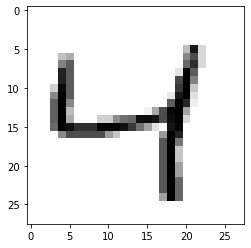

In [8]:

plt.imshow(train_images[2], cmap=plt.cm.binary)
plt.show()


In [9]:

train_images = train_images.reshape((60000, 28 * 28)) # creating vectors of (28, 28) matrix
train_images = train_images.astype('float32')/255



In [10]:

train_labels = to_categorical(train_labels) # turning into one-hot encoded


In [11]:

test_images = test_images.reshape((10000, 28 * 28))# creating vectors of (28, 28) matrix
test_images = test_images.astype('float32')/255


In [12]:

test_labels = to_categorical(test_labels)# turning into one-hot encoded



In [13]:

net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=( 28 * 28, )))
net.add(layers.Dense(10, activation='softmax'))







In [14]:

net.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(net.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
net.fit(train_images, train_labels, epochs = 5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 7s 121us/step - loss: 0.2216 - accuracy: 0.9352
Epoch 2/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.0920 - accuracy: 0.9723
Epoch 3/5
60000/60000 [==============================] - 7s 117us/step - loss: 0.0634 - accuracy: 0.9810
Epoch 4/5
60000/60000 [==============================] - 7s 110us/step - loss: 0.0472 - accuracy: 0.9859
Epoch 5/5
60000/60000 [==============================] - 7s 118us/step - loss: 0.0363 - accuracy: 0.9895


In [16]:
test_loss, test_acc = net.evaluate(test_images, test_labels)
print(f'Test Accuracy, {test_acc}')

10000/10000 [==============================] - 0s 48us/step
Test Accuracy, 0.9818999767303467
